## Final Project
### TOPIC: Credit Card Fraud Detection 

#### Team Member:
1. TOM TITO
2. TEANG SREYROTH
3. SORPORN SOVORTEY
4. POM MOUYLANG
5. DIN PICH
6. VEASNA DARA

* Goal: Identify fraudulent transactions from credit card data using machine learning and deep learning.
* The objective is to develop a machine learning model to detect fraudulent credit card transactions. The goal is to minimize financial losses by accurately distinguishing between legitimate and fraudulent transactions. The solution should handle challenges such as class imbalance and provide reliable predictions to enhance fraud prevention systems

* Challenges:
    * Imbalanced dataset: Fraudulent transactions are much less frequent than genuine ones
    * Real-time prediction: Detection systems need to process transactions quickly.

In [2]:
import pandas as pd

## Data Validation and Checks

1. Check Missing Values
2. Check Duplicates
3. Check Data Type
4. Check the Number of Unique Values in Each Column
5. Check Statistics of the Dataset
6. Check Categories in Categorical Columns
7. Check Data Imbalance (for Target Variable, for Classification problem)

In [3]:
df = pd.read_csv('../data/fraudTest.csv')

In [5]:
# 1. Missing Values
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

There are no Missing Values of Each columns

In [7]:
# Check Duplicates Values
df.duplicated().sum()
print(f"Number of duplicated rows: {df.duplicated().sum()}")

Number of duplicated rows: 0


In [8]:
# Check Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [10]:
# Check the Number of Unique Values in Each Column
df.nunique()

Unnamed: 0               555719
trans_date_trans_time    544760
cc_num                      924
merchant                    693
category                     14
amt                       37256
first                       341
last                        471
gender                        2
street                      924
city                        849
state                        50
zip                         912
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
trans_num                555719
unix_time                544760
merch_lat                546490
merch_long               551770
is_fraud                      2
dtype: int64

In [11]:
# Check Statistics of the Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,555719.0,2.778590e+05,1.604224e+05,0.000000e+00,1.389295e+05,2.778590e+05,4.167885e+05,5.557180e+05
cc_num,555719.0,4.178387e+17,1.309837e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.635331e+15,4.992346e+18
amt,555719.0,6.939281e+01,1.567459e+02,1.000000e+00,9.630000e+00,4.729000e+01,8.301000e+01,2.276811e+04
zip,555719.0,4.884263e+04,2.685528e+04,1.257000e+03,2.629200e+04,4.817400e+04,7.201100e+04,9.992100e+04
lat,555719.0,3.854325e+01,5.061336e+00,2.002710e+01,3.466890e+01,3.937160e+01,4.189480e+01,6.568990e+01
long,555719.0,-9.023133e+01,1.372178e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.017520e+01,-6.795030e+01
city_pop,555719.0,8.822189e+04,3.003909e+05,2.300000e+01,7.410000e+02,2.408000e+03,1.968500e+04,2.906700e+06
unix_time,555719.0,1.380679e+09,5.201104e+06,1.371817e+09,1.376029e+09,1.380762e+09,1.385867e+09,1.388534e+09
merch_lat,555719.0,3.854280e+01,5.095829e+00,1.902742e+01,3.475530e+01,3.937659e+01,4.195416e+01,6.667930e+01
merch_long,555719.0,-9.023138e+01,1.373307e+01,-1.666716e+02,-9.690513e+01,-8.744520e+01,-8.026464e+01,-6.695203e+01


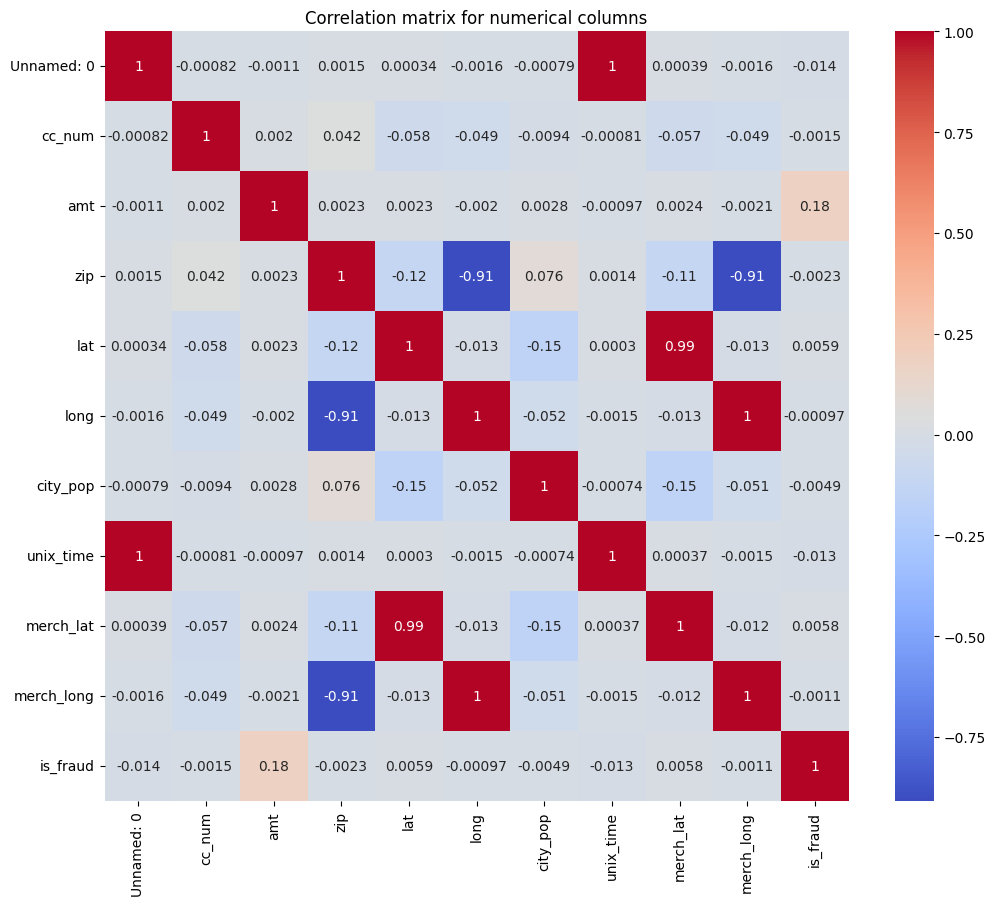

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Select all numeric columns (both int64 and float64)
df_numerical = df.select_dtypes(include=[np.number])

# Plot correlation matrix for numerical columns
plt.figure(figsize=(12,10))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation matrix for numerical columns")
plt.show()

Observations on Correlation:
- long, merch_long, and zip: These features show high correlation, which is expected due to their geographic nature. Some of these features will be considered for removal during the EDA and preprocessing stages to address multicollinearity and improve model performance.

In [13]:
# Check Categories in Categorical Columns
for col in df.select_dtypes(include='object'):
    print(f"Number of unique values in column '{col}': {df[col].nunique()}")

Number of unique values in column 'trans_date_trans_time': 544760
Number of unique values in column 'merchant': 693
Number of unique values in column 'category': 14
Number of unique values in column 'first': 341
Number of unique values in column 'last': 471
Number of unique values in column 'gender': 2
Number of unique values in column 'street': 924
Number of unique values in column 'city': 849
Number of unique values in column 'state': 50
Number of unique values in column 'job': 478
Number of unique values in column 'dob': 910
Number of unique values in column 'trans_num': 555719


Class Distribution (%):
is_fraud
0    99.614014
1     0.385986
Name: proportion, dtype: float64


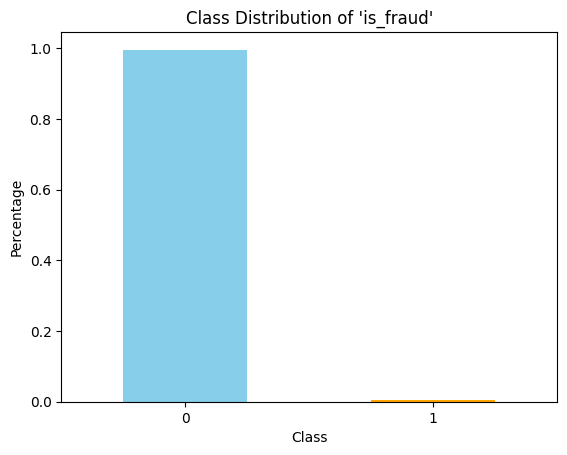

In [14]:
# Check Data Imbalance (for Target Variable, for Classification problem)
# Check class distribution
class_distribution = df['is_fraud'].value_counts(normalize=True)

# Display the distribution as percentages
print("Class Distribution (%):")
print(class_distribution * 100)

class_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Class Distribution of 'is_fraud'")
plt.xlabel("Class")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()

## Exploratory Data Analysis (EDA)

In [15]:
df_eda = df.copy()
df_eda.head(1)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0


In [16]:
pd.options.display.max_columns = None
df_eda.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0


In [17]:
# Convert 'trans_date_trans_time' to datetime format
df_eda['trans_date_trans_time'] = pd.to_datetime(df_eda['trans_date_trans_time'])

# Hour of the Transaction
df_eda['transaction_hour'] = df_eda['trans_date_trans_time'].dt.hour

# Day of the Week
df_eda['day_of_week'] = df_eda['trans_date_trans_time'].dt.day_name()  # Keep only weekday names

# Month of the Transaction
df_eda['transaction_month'] = df_eda['trans_date_trans_time'].dt.month

# Part of the Day
def categorize_part_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    elif 21 <= hour or hour < 5:
        return 'Night'

df_eda['part_of_day'] = df_eda['transaction_hour'].apply(categorize_part_of_day)

# Is Weekend
df_eda['is_weekend'] = df_eda['trans_date_trans_time'].dt.weekday.isin([5, 6]).astype(int)

# Display the new features
df_eda[['transaction_hour', 'day_of_week', 'transaction_month', 'part_of_day', 'is_weekend']].head()

,transaction_hour,day_of_week,transaction_month,part_of_day,is_weekend
0,12,Sunday,6,Afternoon,1
1,12,Sunday,6,Afternoon,1
2,12,Sunday,6,Afternoon,1
3,12,Sunday,6,Afternoon,1
4,12,Sunday,6,Afternoon,1


In [21]:
from datetime import datetime
# Convert 'dob' to datetime
df_eda['dob'] = pd.to_datetime(df_eda['dob'], errors='coerce')

# Calculate age as of December 31, 2020
reference_date = datetime(2020, 12, 31)

df_eda['age'] = (reference_date - df_eda['dob']).dt.days // 365

df_eda['age'].describe()

count    555719.000000
mean         46.675822
std          17.431057
min          15.000000
25%          33.000000
50%          45.000000
75%          58.000000
max          96.000000
Name: age, dtype: float64

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,555719.0,2.778590e+05,1.604224e+05,0.000000e+00,1.389295e+05,2.778590e+05,4.167885e+05,5.557180e+05
cc_num,555719.0,4.178387e+17,1.309837e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.635331e+15,4.992346e+18
amt,555719.0,6.939281e+01,1.567459e+02,1.000000e+00,9.630000e+00,4.729000e+01,8.301000e+01,2.276811e+04
zip,555719.0,4.884263e+04,2.685528e+04,1.257000e+03,2.629200e+04,4.817400e+04,7.201100e+04,9.992100e+04
lat,555719.0,3.854325e+01,5.061336e+00,2.002710e+01,3.466890e+01,3.937160e+01,4.189480e+01,6.568990e+01
long,555719.0,-9.023133e+01,1.372178e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.017520e+01,-6.795030e+01
city_pop,555719.0,8.822189e+04,3.003909e+05,2.300000e+01,7.410000e+02,2.408000e+03,1.968500e+04,2.906700e+06
unix_time,555719.0,1.380679e+09,5.201104e+06,1.371817e+09,1.376029e+09,1.380762e+09,1.385867e+09,1.388534e+09
merch_lat,555719.0,3.854280e+01,5.095829e+00,1.902742e+01,3.475530e+01,3.937659e+01,4.195416e+01,6.667930e+01
merch_long,555719.0,-9.023138e+01,1.373307e+01,-1.666716e+02,-9.690513e+01,-8.744520e+01,-8.026464e+01,-6.695203e+01


Key Points:¶
* is_fraud is the target variable.
* trans_date_trans_time and unix_time both provide time-based information, but the former is more human-readable.
* Features like amt, merchant, and lat/long are crucial for detecting fraudulent transactions based on patterns, amounts, and locations.
* Some personal information like first, last, and cc_num may be sensitive and typically not directly used for modeling.

In [23]:
# Create a more detailed age group column
def categorize_age_group(age):
    if age <= 12:
        return 'Child'
    elif 13 <= age <= 17:
        return 'Teenager'
    elif 18 <= age <= 25:
        return 'Young Adult'
    elif 26 <= age <= 40:
        return 'Adult'
    elif 41 <= age <= 60:
        return 'Middle-Aged'
    elif 61 <= age <= 80:
        return 'Senior'
    else:
        return 'Elderly'
    
df_eda['age_group'] = df_eda['age'].apply(categorize_age_group)

# Display the new 'age_group' column
df_eda[['age', 'age_group']].head()

,age,age_group
0,52,Middle-Aged
1,30,Adult
2,50,Middle-Aged
3,33,Adult
4,65,Senior


In [33]:
# Function to calculate distance between cardholder and merchant
def calculate_distance(X, lat_col, long_col, merch_lat_col, merch_long_col, new_column):
    """
    Calculate the distance (in kilometers) between two geographic coordinates using the Haversine formula.

    Parameters:
    - X: DataFrame containing the latitude and longitude columns.
    - lat_col: Name of the column containing the latitude of the first location.
    - long_col: Name of the column containing the longitude of the first location.
    - merch_lat_col: Name of the column containing the latitude of the second location (merchant's location).
    - merch_long_col: Name of the column containing the longitude of the second location (merchant's location).
    - new_column: Name of the column where the calculated distance should be stored.

    Returns:
    - DataFrame with a new column containing the calculated distance in kilometers.
    """
    X = X.copy()
    
    # Convert latitudes and longitudes to radians
    lat1 = np.radians(X[lat_col])
    lon1 = np.radians(X[long_col])
    lat2 = np.radians(X[merch_lat_col])
    lon2 = np.radians(X[merch_long_col])
    
    # Haversine formula to calculate distance
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    R = 6371  # Radius of the Earth in kilometers
    X[new_column] = R * c  # Distance in kilometers

    return X

In [34]:
# Apply the function to calculate distance for each transaction
df_eda = calculate_distance(df_eda, 'lat', 'long', 'merch_lat', 'merch_long', 'distance')

# Display the new 'distance' column
df_eda[['lat', 'long', 'merch_lat', 'merch_long', 'distance']].head()

,lat,long,merch_lat,merch_long,distance
0,33.9659,-80.9355,33.986391,-81.200714,24.561462
1,40.3207,-110.4360,39.450498,-109.960431,104.925092
2,40.6729,-73.5365,40.495810,-74.196111,59.080078
3,28.5697,-80.8191,28.812398,-80.883061,27.698567
4,44.2529,-85.0170,44.959148,-85.884734,104.335106


In [35]:
df_eda['distance'].describe()

count    555719.000000
mean         76.104902
std          29.117079
min           0.123883
25%          55.286255
50%          78.179517
75%          98.520760
max         150.922504
Name: distance, dtype: float64

In [36]:
# Create bins for 'city_pop'
city_pop_bins = [0, 10000, 50000, 100000, 500000, 1000000, np.inf]
city_pop_labels = ['<10K', '10K-50K', '50K-100K', '100K-500K', '500K-1M', '>1M']

# Bin the 'city_pop' column
df_eda['city_pop_bin'] = pd.cut(df_eda['city_pop'], bins=city_pop_bins, labels=city_pop_labels)

In [37]:
columns_to_remove = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant',
        'first', 'last',  'street', 'city', 'state', 'zip',
       'lat', 'long',  'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long'
]

# Drop the specified columns from df_eda
df_eda.drop(columns=columns_to_remove, inplace=True)

In [38]:
df_eda.columns

Index(['category', 'amt', 'gender', 'city_pop', 'is_fraud', 'transaction_hour',
       'day_of_week', 'transaction_month', 'part_of_day', 'is_weekend', 'age',
       'age_group', 'distance', 'city_pop_bin'],
      dtype='object')

C:\Users\USer\AppData\Local\Temp\ipykernel_17816\2377866538.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud', data=df_eda, palette='viridis')


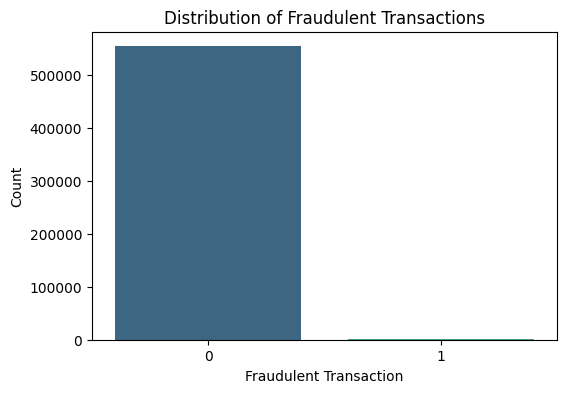

In [ ]:
# What is the distribution of the target variable is_fraud?

# Plot the distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x='is_fraud', data=df_eda, palette='viridis')
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Fraudulent Transaction')
plt.ylabel('Count')
plt.show()

The dataset appears to be imbalanced, with significantly more non-fraudulent transactions than fraudulent ones. This indicates a need for techniques like oversampling, undersampling, or anomaly detection to address the imbalance.

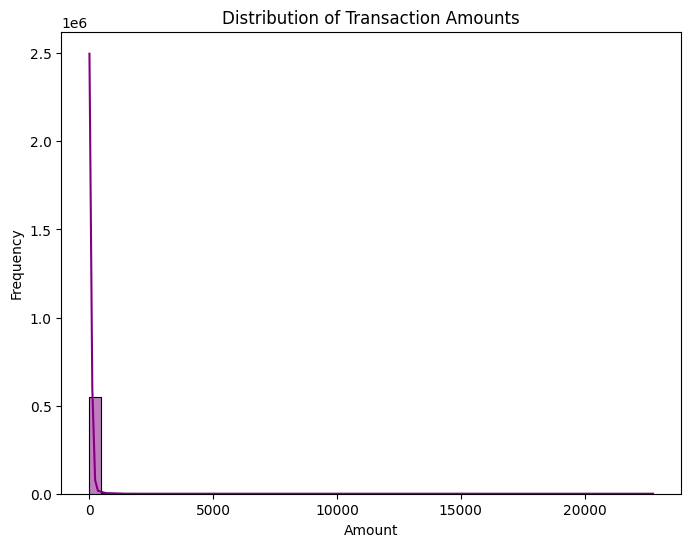

In [26]:
# What is the distribution of the transaction amount?
plt.figure(figsize=(8, 6))
sns.histplot(df_eda['amt'], kde=True, color='purple', bins=50)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

The transaction amounts are following a skewed distribution with a large number of small transactions and a few large ones. Large amounts could potentially be associated with fraudulent activity.

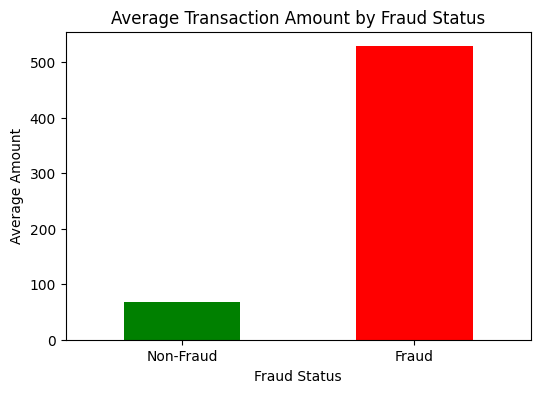

In [27]:
# what is the average transaction amount by fraud status?

# Group by 'is_fraud' and calculate the mean transaction amount
avg_amt_fraud = df_eda.groupby('is_fraud')['amt'].mean()

# Plot the result
avg_amt_fraud.plot(kind='bar', color=['green', 'red'], figsize=(6, 4))
plt.title('Average Transaction Amount by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Average Amount')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'], rotation=0)
plt.show()

The fraudulent transactions show a higher average amount.

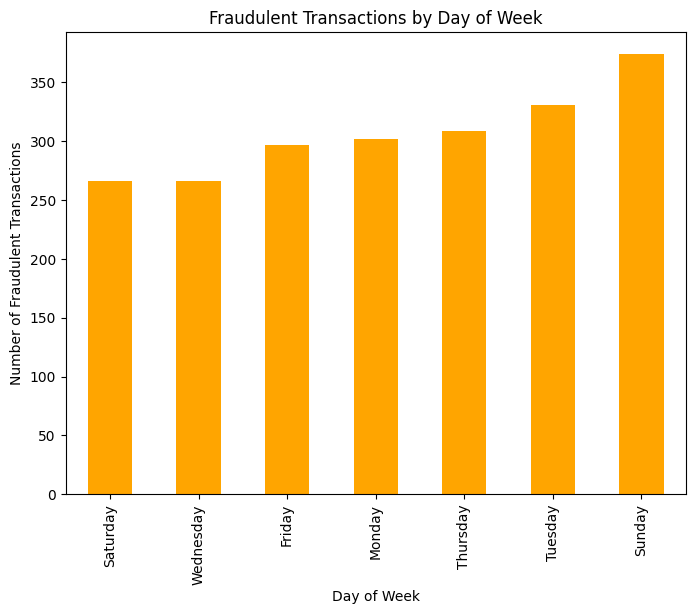

In [28]:
# How does the day of the week affect the occurnece of fraud?

# Groupby 'day_of_week' and calculate the sum of fraudulent transactions
fraud_by_day = df_eda.groupby('day_of_week')['is_fraud'].sum()

# Plot the result
plt.figure(figsize=(8, 6))
fraud_by_day.sort_values().plot(kind='bar', color='orange')
plt.title('Fraudulent Transactions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

Fraudulent transactions may occur more frequent on weekends.

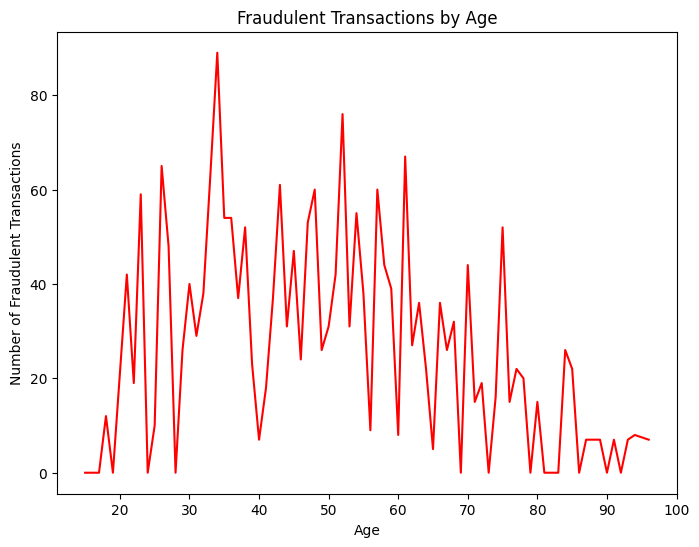

In [29]:
# Is there a correlation between age and fraud?

# Grouby age and calculate the sum of fraudulent transactions
fraud_by_age = df_eda.groupby('age')['is_fraud'].sum()

plt.figure(figsize=(8, 6))
fraud_by_age.plot(kind='line', color='red')
plt.title('Fraudulent Transactions by Age')
plt.xlabel('Age')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

Age group 30-35 are associated with higher fraud transaction numbers.

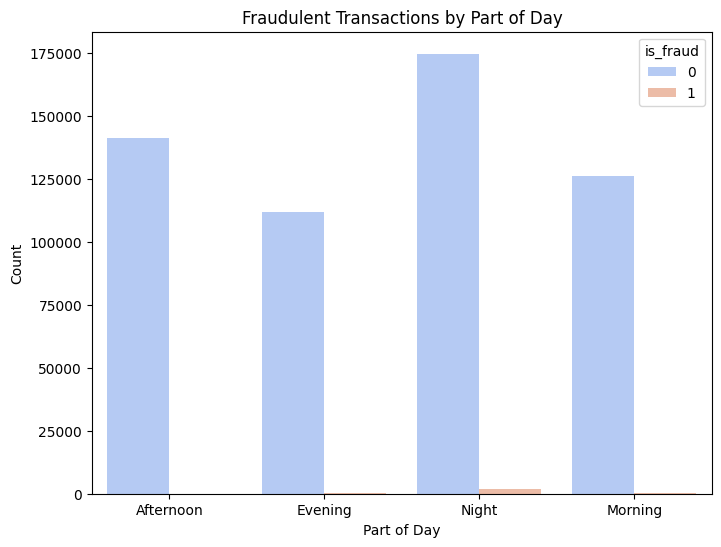

In [30]:
# What is the distribution of part_of_day with respect to fraud?

# Plot the distribution of fraud by part of the day
plt.figure(figsize=(8, 6))
sns.countplot(x='part_of_day', hue='is_fraud', data=df_eda, palette='coolwarm')
plt.title('Fraudulent Transactions by Part of Day')
plt.xlabel('Part of Day')
plt.ylabel('Count')
plt.show()

Fraudulent transactions are high in the Night time.

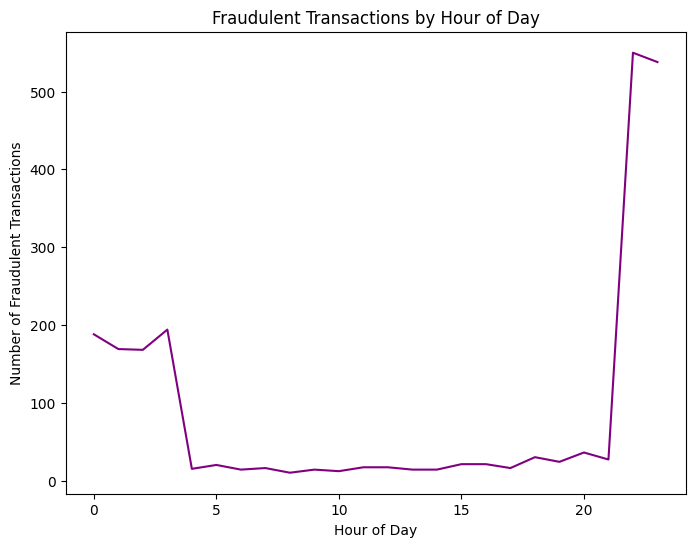

In [31]:
# How does the transaction_hour relate to fraud?
fraud_by_hour = df_eda.groupby('transaction_hour')['is_fraud'].sum()

# Plot the result
plt.figure(figsize=(8, 6))
fraud_by_hour.plot(kind='line', color='purple')
plt.title('Fraudulent Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

The fraudulent transactions are happening more on 22nd hour.

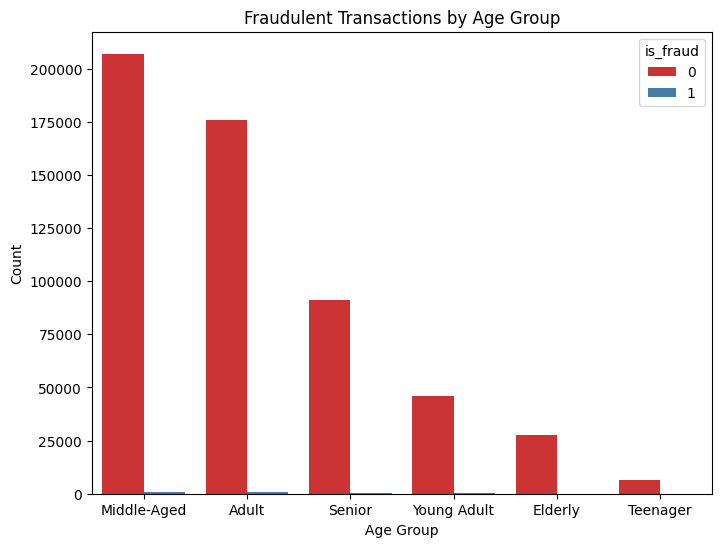

In [32]:
# How does age_group affect fraud occurrence?

plt.figure(figsize=(8, 6))
sns.countplot(x='age_group', hue='is_fraud', data=df_eda, palette='Set1')
plt.title('Fraudulent Transactions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

Fraudulent transactions more in the Middle-Aged in the group.

C:\Users\USer\AppData\Local\Temp\ipykernel_17816\3877264100.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_distance_bin = df_eda.groupby('distance_bin')['is_fraud'].sum()


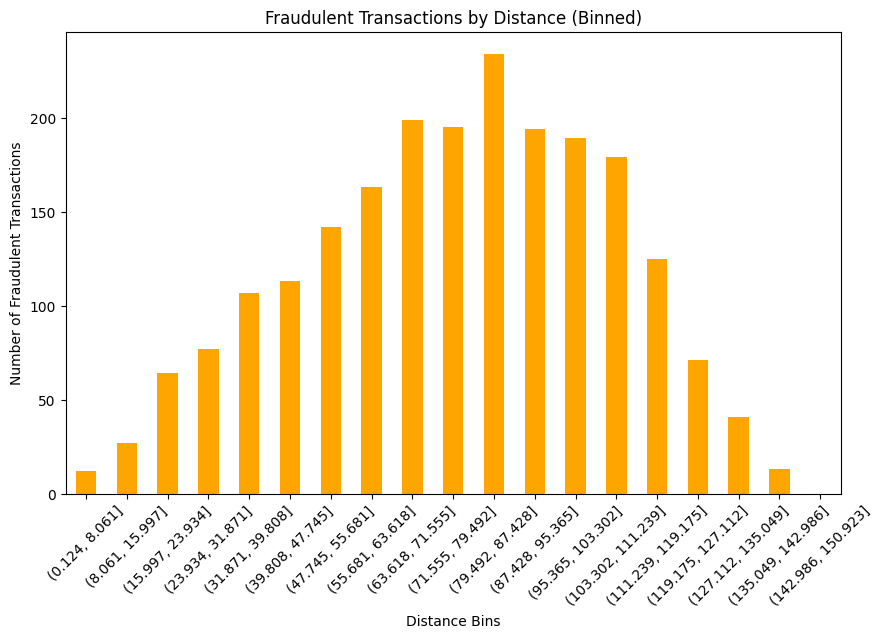

In [42]:
# Is there a correlation between distance and fraud?
distance_bins = np.linspace(df_eda['distance'].min(), df_eda['distance'].max(), num=20)

#Bin the 'distance' column
df_eda['distance_bin'] = pd.cut(df_eda['distance'], bins=distance_bins)
df_eda.head()

# Group by distance bins and calculate the sum of fraudulent transactions
fraud_by_distance_bin = df_eda.groupby('distance_bin')['is_fraud'].sum()

# Plot the result
plt.figure(figsize=(10, 6))
fraud_by_distance_bin.plot(kind='bar', color='orange')
plt.title('Fraudulent Transactions by Distance (Binned)')
plt.xlabel('Distance Bins')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()


The fraudulent transactions are higher around 70-80km distance.

C:\Users\USer\AppData\Local\Temp\ipykernel_17816\349975006.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_city_pop_bin = df_eda.groupby('city_pop_bin')['is_fraud'].sum()


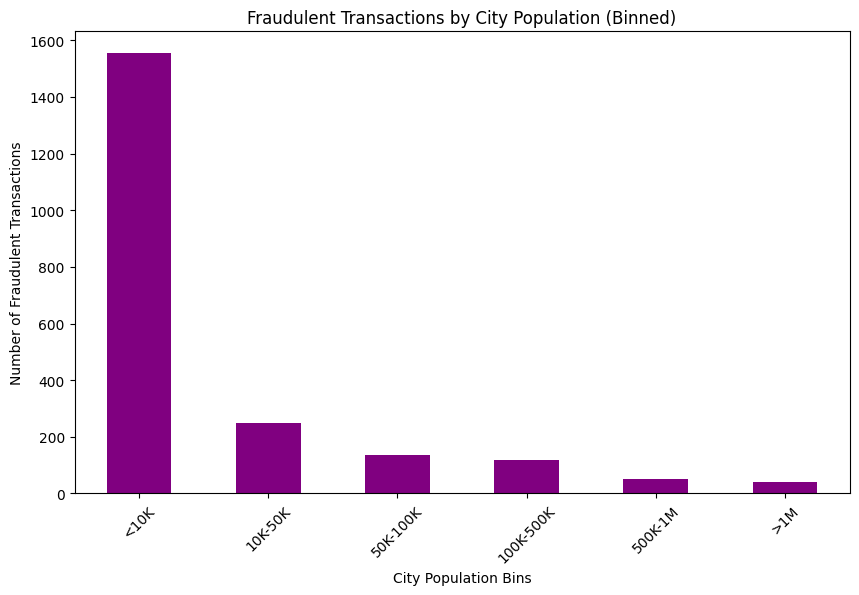

In [44]:
# What is the relationship between city_pop and fraud?

fraud_by_city_pop_bin = df_eda.groupby('city_pop_bin')['is_fraud'].sum()

plt.figure(figsize=(10, 6))
fraud_by_city_pop_bin.plot(kind='bar', color='purple')
plt.title('Fraudulent Transactions by City Population (Binned)')
plt.xlabel('City Population Bins')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()

Cities with lower population, has more fraudulent transactions

In [46]:
# define numerical & categorical columns

numerical_features = [
    feature for feature in df_eda.columns
    if pd.api.types.is_numeric_dtype(df_eda[feature]) and feature != "is_fraud"
]

discrete_numerical_features = [feature for feature in numerical_features if df_eda[feature].nunique() < 25]

continuous_numerical_features = [feature for feature in numerical_features if df_eda[feature].nunique() >= 25]

categorical_features = [feature for feature in df_eda.columns if df_eda[feature].dtype == 'object']

target_column = 'is_fraud'

print(f'There are {len(numerical_features)} numerical features : {numerical_features}')
print(f'\nThere are {len(discrete_numerical_features)} discrete numerical features : {discrete_numerical_features}')
print(f'\nThere are {len(continuous_numerical_features)} continuos numerical features : {continuous_numerical_features}')
print(f'\nThere are {len(categorical_features)} categorical features : {categorical_features}')

There are 7 numerical features : ['amt', 'city_pop', 'transaction_hour', 'transaction_month', 'is_weekend', 'age', 'distance']

There are 3 discrete numerical features : ['transaction_hour', 'transaction_month', 'is_weekend']

There are 4 continuos numerical features : ['amt', 'city_pop', 'age', 'distance']

There are 5 categorical features : ['category', 'gender', 'day_of_week', 'part_of_day', 'age_group']


In [47]:
df_eda['age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 555719 entries, 0 to 555718
Series name: age
Non-Null Count   Dtype
--------------   -----
555719 non-null  int64
dtypes: int64(1)
memory usage: 4.2 MB


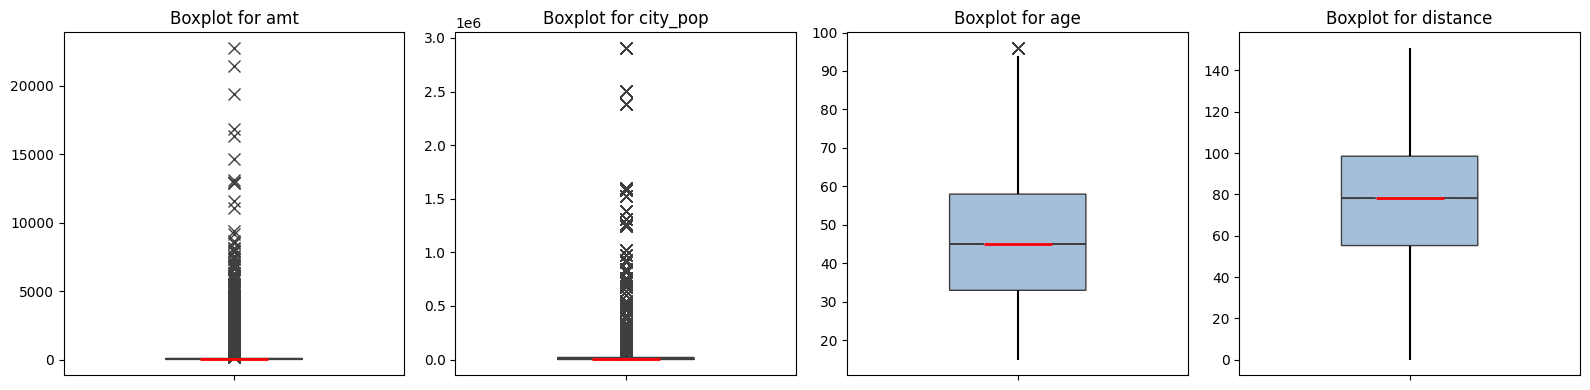

In [48]:
import math
# Box plot for continuous numerical features

# Calculate the number of rows required to plot all features
num_cols = 4  # 4 plots per row
num_rows = math.ceil(len(continuous_numerical_features) / num_cols)

# Create a figure with subplots (4 plots per row)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * num_cols))

# Flatten axes array for easy iteration (in case of multiple rows)
axes = axes.flatten()

# Iterate through numerical features and plot each one
for i, feature in enumerate(continuous_numerical_features):
    sns.boxplot(
        y=df_eda[feature], 
        ax=axes[i], 
        notch=True,  # Add notch to the boxplot
        showcaps=False,  # Hide the caps
        flierprops={"marker": "x", "color": "r", "markersize": 8},  # Customizing outliers
        boxprops={"facecolor": (.3, .5, .7, .5)},  # Set the box color with transparency
        medianprops={"color": "r", "linewidth": 2},  # Customize the median line
        whiskerprops={"color": "black", "linewidth": 1.5},  # Customize whiskers
        width=0.4  # Shrink the box width
    )
    axes[i].set_title(f'Boxplot for {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')


# Hide any unused subplots if there are fewer than 4 features in the last row
for i in range(len(continuous_numerical_features), len(axes)):
    axes[i].axis('off')

# Adjust the layout to make sure all plots are well spaced
plt.tight_layout()
plt.show()

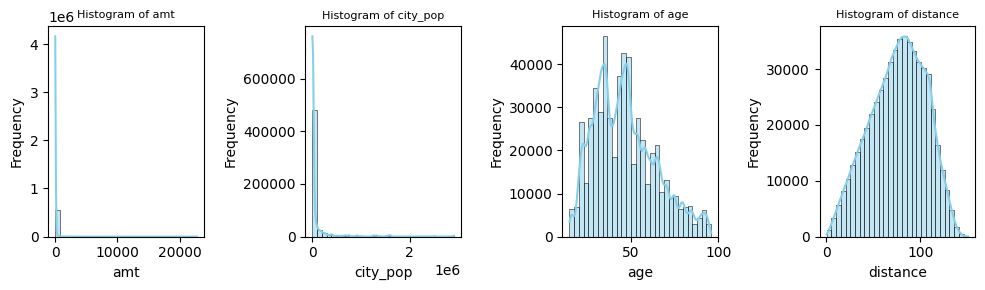

In [49]:
# Histograms for continuous numerical features
# Calculate the number of rows required to plot all features in a 4x4 grid
num_cols = 4  # 4 plots per row
num_rows = math.ceil(len(continuous_numerical_features) / num_cols)


# Create the subplots dynamically based on the number of numerical features
plt.figure(figsize=(10, 3 * num_rows))  # Adjust figure size based on the number of rows

# Loop through the numerical features to plot individual histograms
for i, feature in enumerate(continuous_numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)  # Create subplots dynamically
    sns.histplot(df_eda[feature], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {feature}', fontsize=8)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

The 'amt' column is highly skewed, so the Yeo-Johnson transformation will be applied.

The 'city_pop' column is also skewed, but it will be removed. Instead, the categorical column 'city_pop_bin' will be used for the analysis.

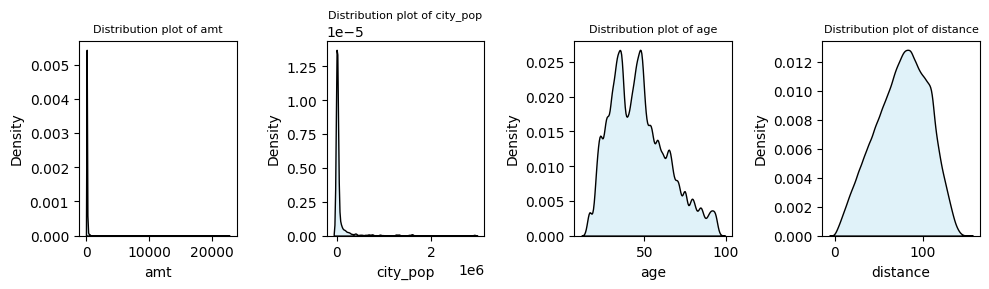

In [50]:
# Distribution plot continuous numerical features
# Calculate the number of rows required to plot all features in a 4x4 grid
num_cols = 4  # 4 plots per row
num_rows = math.ceil(len(continuous_numerical_features) / num_cols)


# Create the subplots dynamically based on the number of numerical features
plt.figure(figsize=(10, 3 * num_rows))  # Adjust figure size based on the number of rows

# Loop through the numerical features to plot distribution plots
for i, feature in enumerate(continuous_numerical_features, 1):
    plt.subplot(num_rows, num_cols, i) 
    sns.kdeplot(df_eda[feature], fill=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution plot of {feature}', fontsize=8)
    plt.xlabel(feature)
    plt.ylabel('Density')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

In [51]:
# Check for Skewness in Numerical Columns
for feature in continuous_numerical_features:
    skewness = df_eda[feature].skew()
    if abs(skewness) > 1:
        print(f"'{feature}' is highly skewed with skewness: {skewness:.2f}")

'amt' is highly skewed with skewness: 37.13
'city_pop' is highly skewed with skewness: 5.58


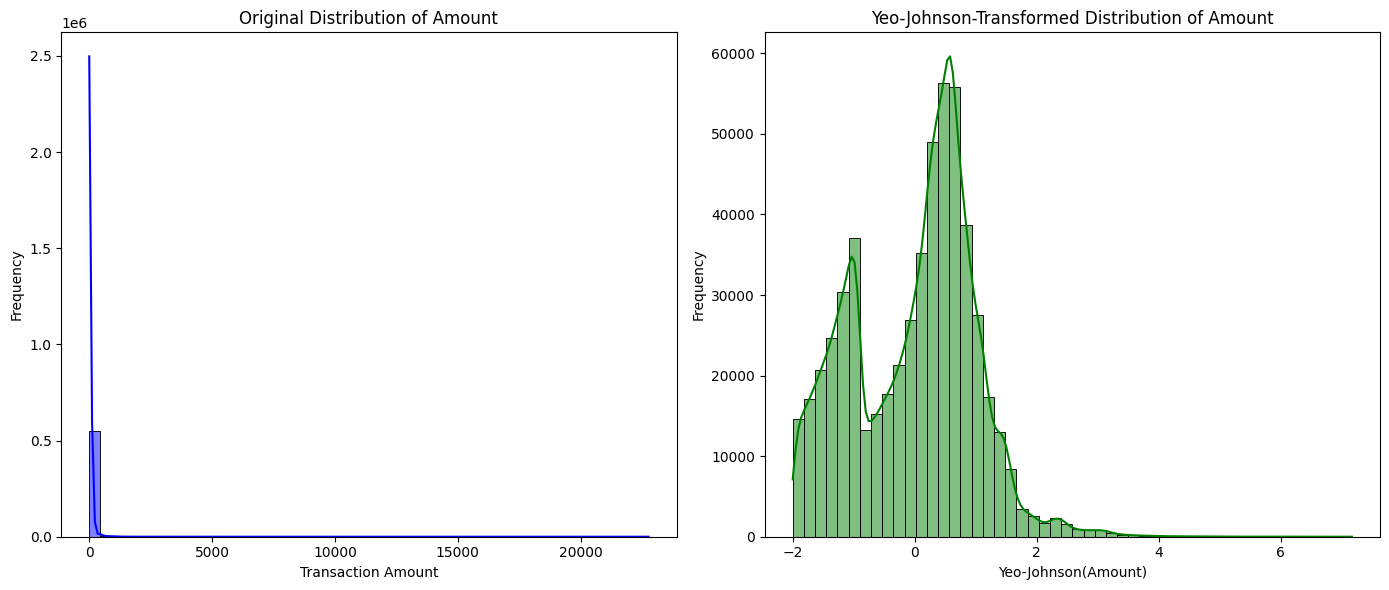

In [53]:
# Apply Yeo-Johnson Transformation transformation 

from sklearn.preprocessing import PowerTransformer

transformation = PowerTransformer(method='yeo-johnson')
df_eda['amt_yeo_johnson'] = transformation.fit_transform(df_eda[['amt']])

# Plot original and transformed distributions side by side
plt.figure(figsize=(14, 6))

# Original Distribution
plt.subplot(1, 2, 1)
sns.histplot(df_eda['amt'], bins=50, kde=True, color='blue')
plt.title('Original Distribution of Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

# Transformed Distribution
plt.subplot(1, 2, 2)
sns.histplot(df_eda['amt_yeo_johnson'], bins=50, kde=True, color='green')
plt.title('Yeo-Johnson-Transformed Distribution of Amount')
plt.xlabel('Yeo-Johnson(Amount)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Data Preprocessing

In [56]:
train_df = pd.read_csv('../data/fraudTrain.csv')
test_df = pd.read_csv('../data/fraudTest.csv')
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [58]:
target_column = 'is_fraud'
X_train_raw = train_df.drop(columns=target_column, axis=1)

y_train = train_df[target_column]

X_test_raw = test_df.drop(columns=target_column, axis=1)

y_test = test_df[target_column]

print(f"Shape of X_train_raw: {X_train_raw.shape}")
print(f"Shape of X_test_raw: {X_test_raw.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train_raw: (1296675, 22)
Shape of X_test_raw: (555719, 22)
Shape of y_train: (1296675,)
Shape of y_test: (555719,)


In [59]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

class ChangeDataType(BaseEstimator, TransformerMixin):
    # Converts specified columns to datetime format.
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            X[col] = pd.to_datetime(X[col], errors='coerce')
        return X

class DateTimeFeatures(BaseEstimator, TransformerMixin):
    # Extracts date and time-related features like hour, month, day of the week, and part of the day.
    def __init__(self, date_column, transaction_hour_bins, transaction_hour_labels):
        self.date_column = date_column
        self.transaction_hour_bins = transaction_hour_bins
        self.transaction_hour_labels = transaction_hour_labels
        self.new_columns = ['transaction_hour', 'transaction_month', 'is_weekend', 'day_of_week', 'part_of_day']
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['transaction_hour'] = X[self.date_column].dt.hour
        X['transaction_month'] = X[self.date_column].dt.month
        X['is_weekend'] = X[self.date_column].dt.weekday.isin([5, 6]).astype(int)
        
        # Day of week: Monday=0, Sunday=6
        X['day_of_week'] = X[self.date_column].dt.day_name()
        
        # Part of day classification
        X['part_of_day'] = pd.cut(X['transaction_hour'], 
                                  bins=self.transaction_hour_bins, 
                                  labels=self.transaction_hour_labels, 
                                  right=True)
        return X

class AgeFeature(BaseEstimator, TransformerMixin):
    # Calculates age based on the date of birth (DOB) column.
    def __init__(self, dob_column):
        self.dob_column = dob_column
        self.new_column = 'age'

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        reference_date = pd.Timestamp(2020, 12, 31)
        X[self.new_column] = (reference_date - X[self.dob_column]).dt.days // 365
        return X


class CalculateDistance(BaseEstimator, TransformerMixin):
    # Calculates the distance between two geographical points using the Haversine formula.
    def __init__(self, lat_col, long_col, merch_lat_col, merch_long_col):
        self.lat_col = lat_col
        self.long_col = long_col
        self.merch_lat_col = merch_lat_col
        self.merch_long_col = merch_long_col
        self.new_column = 'distance'

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        
        # Convert latitudes and longitudes to radians
        lat1 = np.radians(X[self.lat_col])
        lon1 = np.radians(X[self.long_col])
        lat2 = np.radians(X[self.merch_lat_col])
        lon2 = np.radians(X[self.merch_long_col])
        
        # Haversine formula to calculate distance
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
        R = 6371  # Radius of the Earth in kilometers
        X[self.new_column] = R * c  # Distance in kilometers
        
        return X

class BinCityPopulation(BaseEstimator, TransformerMixin):
    # Groups city population into bins with specified labels.
    def __init__(self, city_pop_bins, city_pop_labels):
        self.city_pop_bins = city_pop_bins
        self.city_pop_labels = city_pop_labels
        self.new_column = 'city_pop_bin'

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X[self.new_column] = pd.cut(X['city_pop'], bins=self.city_pop_bins, labels=self.city_pop_labels)
        return X
    

class YeoJohnsonTransformer(BaseEstimator, TransformerMixin):
    # Applies the Yeo-Johnson transformation to normalize the 'amt' column.
    def __init__(self):
        self.transformer = PowerTransformer(method='yeo-johnson')
        self.new_column = 'amt_yeo_johnson'

    def fit(self, X, y=None):
        self.transformer.fit(X[['amt']])
        return self

    def transform(self, X):
        X = X.copy()
        X[self.new_column] = self.transformer.transform(X[['amt']])
        return X


class DropColumns(BaseEstimator, TransformerMixin):
    # Drops specified columns from the dataset.
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.drop(columns=self.columns, errors='ignore')
        self.remaining_columns = X.columns
        return X


class LabelEncoding(BaseEstimator, TransformerMixin):
    # Performs label encoding for specified categorical columns.
    def __init__(self, columns):
        self.columns = columns
        self.label_encoders = {}

    def fit(self, X, y=None):
        for col in self.columns:
            le = LabelEncoder()
            le.fit(X[col])
            self.label_encoders[col] = le
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            X[col] = self.label_encoders[col].transform(X[col])
        return X

class ScaleFeatures(BaseEstimator, TransformerMixin):
    # Scales numerical features to a range of 0 to 1 using MinMaxScaler.
    def __init__(self):
        self.scaler = MinMaxScaler()

    def fit(self, X, y=None):
        self.scaler.fit(X)
        return self

    def transform(self, X):
        X = X.copy()
        X[:] = self.scaler.transform(X)
        return X

In [60]:
from sklearn.pipeline import Pipeline

# Preprocessing pipeline
city_pop_bins = [0, 10000, 50000, 100000, 500000, 1000000, np.inf]
city_pop_labels = ['<10K', '10K-50K', '50K-100K', '100K-500K', '500K-1M', '>1M']

transaction_hour_bins=[-1, 5, 11, 17, 21, 24]
transaction_hour_labels=['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night']

drop_columns = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'amt', 
                'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long', 
                'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long']

categorical_features = ['category', 'gender', 'day_of_week', 'part_of_day', 'city_pop_bin']

preprocessor = Pipeline([
    ('change_dtype', ChangeDataType(columns=['trans_date_trans_time', 'dob'])),
    ('datetime_features', DateTimeFeatures(date_column='trans_date_trans_time',
                                           transaction_hour_bins = transaction_hour_bins,
                                           transaction_hour_labels = transaction_hour_labels)),
    ('age_feature', AgeFeature(dob_column='dob')),
    ('calculate_distance', CalculateDistance(lat_col='lat', long_col='long', 
                                             merch_lat_col='merch_lat', merch_long_col='merch_long')),
    ('bin_city_pop', BinCityPopulation(city_pop_bins = city_pop_bins, city_pop_labels = city_pop_labels)),
    ('yeo_johnson', YeoJohnsonTransformer()),
    ('drop_columns', DropColumns(columns=drop_columns)),
    ('label_encoding', LabelEncoding(columns=categorical_features)),
    ('scale_features', ScaleFeatures()),
])

In [61]:
# Fit and transform the training data
train_preprocessed = preprocessor.fit_transform(X_train_raw)
train_preprocessed[target_column] = y_train.values
train_preprocessed.head(2)

C:\Users\USer\AppData\Local\Temp\ipykernel_17816\1595042217.py:168: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.61538462 0.30769231 0.         ... 0.07692308 0.07692308 0.07692308]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  X[:] = self.scaler.transform(X)
C:\Users\USer\AppData\Local\Temp\ipykernel_17816\1595042217.py:168: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.         0.         ... 0.52173913 0.52173913 0.52173913]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  X[:] = self.scaler.transform(X)
C:\Users\USer\AppData\Local\Temp\ipykernel_17816\1595042217.py:168: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.         0.         ... 0.45454545 0.454

,category,gender,transaction_hour,transaction_month,is_weekend,day_of_week,part_of_day,age,distance,city_pop_bin,amt_yeo_johnson,is_fraud
0,0.615385,0,0.0,0.0,0,0.833333,0.5,0.209877,0.516620,0.8,0.073333,0
1,0.307692,0,0.0,0.0,0,0.833333,0.5,0.333333,0.198494,0.8,0.309368,0


In [62]:
# Transform the test data
test_preprocessed = preprocessor.transform(X_test_raw)
test_preprocessed[target_column] = y_test.values
test_preprocessed.sample(2)

C:\Users\USer\AppData\Local\Temp\ipykernel_17816\1595042217.py:168: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.76923077 0.76923077 0.38461538 ... 0.53846154 1.         0.        ]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  X[:] = self.scaler.transform(X)
C:\Users\USer\AppData\Local\Temp\ipykernel_17816\1595042217.py:168: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.52173913 0.52173913 0.52173913 ... 1.         1.         1.        ]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  X[:] = self.scaler.transform(X)
C:\Users\USer\AppData\Local\Temp\ipykernel_17816\1595042217.py:168: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.45454545 0.45454545 0.45454545 ... 1.         1.   

,category,gender,transaction_hour,transaction_month,is_weekend,day_of_week,part_of_day,age,distance,city_pop_bin,amt_yeo_johnson,is_fraud
260936,0.769231,0,0.608696,0.727273,0,0.0,0.0,0.814815,0.405753,0.2,0.314786,0
533870,0.769231,0,0.565217,1.000000,1,0.5,0.0,0.419753,0.542349,0.6,0.340325,0


In [63]:
# Save the preprocessor pipeline to a file for later use
import joblib
joblib.dump(preprocessor, 'preprocessor.joblib')

['preprocessor.joblib']

In [64]:
# Load the preprocessor pipeline from the saved file
preprocessor_loaded = joblib.load('preprocessor.joblib')

## Dealing with Imbalance dataset

In [65]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

# Class to oversample the minority class using the Synthetic Minority Over-sampling Technique (SMOTE)
class SMOTESampler:
    def __init__(self, target_column):
        self.target_column = target_column
        self.sampler = SMOTE(random_state=42)

    # Fits the sampler and resamples the data to balance the target column
    def fit_resample(self, df):
        X = df.drop(columns=[self.target_column])
        y = df[self.target_column]
        X_resampled, y_resampled = self.sampler.fit_resample(X, y)
        return X_resampled.assign(**{self.target_column: y_resampled})


# Class to oversample the minority class using the Adaptive Synthetic (ADASYN) method
class ADASYN_Sampler:
    def __init__(self, target_column):
        self.target_column = target_column
        self.sampler = ADASYN(random_state=42)

    # Fits the sampler and resamples the data to balance the target column
    def fit_resample(self, df):
        X = df.drop(columns=[self.target_column])
        y = df[self.target_column]
        X_resampled, y_resampled = self.sampler.fit_resample(X, y)
        return X_resampled.assign(**{self.target_column: y_resampled})
    
# Class to reduce data imbalance by removing Tomek Links (overlapping majority samples near minority samples)
class TomekLinksSampler:
    def __init__(self, target_column):
        self.target_column = target_column
        self.sampler = TomekLinks()

    # Fits the sampler and resamples the data to reduce Tomek Links
    def fit_resample(self, df):
        X = df.drop(columns=[self.target_column])
        y = df[self.target_column]
        X_resampled, y_resampled = self.sampler.fit_resample(X, y)
        return X_resampled.assign(**{self.target_column: y_resampled})


# Class to combine SMOTE oversampling and Tomek Links removal for handling imbalanced data
class SMOTETomekSampler:
    def __init__(self, target_column):
        self.target_column = target_column
        self.sampler = SMOTETomek(random_state=42)

    # Fits the sampler and resamples  the data using a combination of SMOTE and Tomek Links
    def fit_resample(self, df):
        X = df.drop(columns=[self.target_column])
        y = df[self.target_column]
        X_resampled, y_resampled = self.sampler.fit_resample(X, y)
        return X_resampled.assign(**{self.target_column: y_resampled})

In [66]:
# Apply SMOTE
smote_sampler = SMOTESampler(target_column=target_column)
smote_resampled_df = smote_sampler.fit_resample(train_preprocessed)
print(f"SMOTE completed")

# Apply ADASYN
adasyn_sampler = ADASYN_Sampler(target_column=target_column)
adasyn_resampled_df = adasyn_sampler.fit_resample(train_preprocessed)
print(f"ADASYN completed")

SMOTE completed
ADASYN completed


In [67]:
print(smote_resampled_df[target_column].value_counts())
print(adasyn_resampled_df[target_column].value_counts())

is_fraud
0    1289169
1    1289169
Name: count, dtype: int64
is_fraud
1    1289977
0    1289169
Name: count, dtype: int64


In [68]:
smote_resampled_df.head()

,category,gender,transaction_hour,transaction_month,is_weekend,day_of_week,part_of_day,age,distance,city_pop_bin,amt_yeo_johnson,is_fraud
0,0.615385,0,0.0,0.0,0,0.833333,0.5,0.209877,0.516620,0.8,0.073333,0
1,0.307692,0,0.0,0.0,0,0.833333,0.5,0.333333,0.198494,0.8,0.309368,0
2,0.000000,1,0.0,0.0,0,0.833333,0.5,0.530864,0.711292,0.8,0.378388,0
3,0.153846,1,0.0,0.0,0,0.833333,0.5,0.481481,0.628890,0.8,0.232707,0
4,0.692308,1,0.0,0.0,0,0.833333,0.5,0.234568,0.509777,0.8,0.226849,0


## Model Training and Evaluation

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Defining the models for classification
base_models_classification = {
    "logistic_regression": LogisticRegression(random_state=42),
#    "svm": SVC(random_state=random_state, probability=True),  # SVM with probability estimates enabled
#    "decision_tree": DecisionTreeClassifier(random_state=random_state),
    "random_forest": RandomForestClassifier(random_state=42),
#    "gradient_boosting": GradientBoostingClassifier(random_state=random_state),
#    "adaboost": AdaBoostClassifier(random_state=random_state),
#    "xgboost": XGBClassifier(random_state=random_state, use_label_encoder=False, eval_metric="logloss"),
#    "catboost": CatBoostClassifier(random_state=random_state, verbose=0),
}

In [71]:
X_train = smote_resampled_df.drop(columns=[target_column])  # Features
y_train = smote_resampled_df[target_column]  # Target

X_test = test_preprocessed.drop(columns=[target_column], axis='columns')
y_test = test_preprocessed[target_column]

In [80]:
X_test.head()

,category,gender,transaction_hour,transaction_month,is_weekend,day_of_week,part_of_day,age,distance,city_pop_bin,amt_yeo_johnson
0,0.769231,1,0.521739,0.454545,1,0.5,0.0,0.456790,0.161341,0.0,0.043164
1,0.769231,0,0.521739,0.454545,1,0.5,0.0,0.185185,0.689720,0.8,0.198989
2,0.384615,0,0.521739,0.454545,1,0.5,0.0,0.432099,0.388296,0.2,0.225488
3,0.692308,1,0.521739,0.454545,1,0.5,0.0,0.222222,0.181967,0.6,0.257373
4,1.000000,1,0.521739,0.454545,1,0.5,0.0,0.617284,0.685840,0.8,0.048743


In [74]:
lg_model = LogisticRegression(random_state=42)
lg_model.fit(X_train, y_train)

lg_pred = lg_model.predict(X_test)

In [77]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score
def evaluate_model(y_test, y_pred):
    confusion_mat = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{confusion_mat}')

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')

Logistic Regression
Confusion Matrix:
[[468768  84806]
 [   501   1644]]
Accuracy: 0.8464925618882925


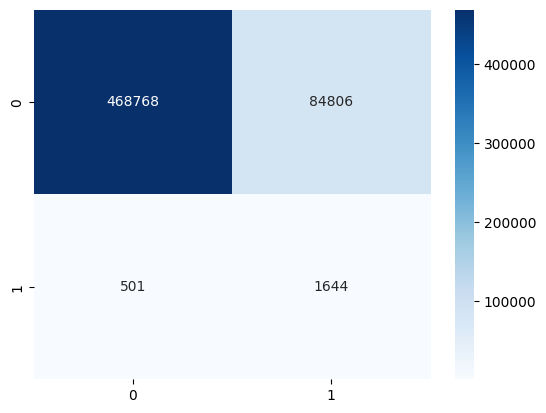

In [76]:
print("Logistic Regression")
evaluate_model(y_test, lg_pred)

Random forest
Confusion Matrix:
[[553254    320]
 [   448   1697]]
Accuracy: 0.9986180065824635


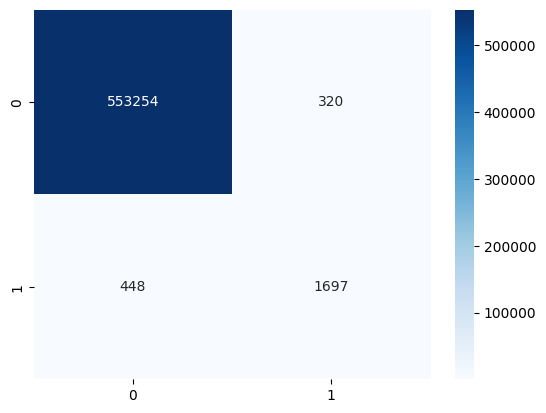

In [78]:
print("Random forest")
evaluate_model(y_test, rf_pred)

In [79]:
import joblib

joblib.dump(lg_model, 'lg_model1.pt')
joblib.dump(rf_model, 'rf_model1.pt')

['rf_model1.pt']

## ANN 

In [81]:
from torch.utils.data import Dataset, DataLoader
import torch
from torch import nn

class MyDataset(Dataset):
    def __init__(self, x, y):
        if isinstance(x, pd.DataFrame):
            x = x.values
        if isinstance(y, pd.Series):
            y = y.values    
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [82]:
dataset = MyDataset(X_train, y_train)
dataloader_train = DataLoader(dataset, batch_size=200, shuffle=True)
for i, (x, y) in enumerate(dataloader_train):
    print(f"Batch {i}: Input_dim: {x.size()}, Output_dim: {y.size()}")

Batch 0: Input_dim: torch.Size([200, 11]), Output_dim: torch.Size([200])
Batch 1: Input_dim: torch.Size([200, 11]), Output_dim: torch.Size([200])
Batch 2: Input_dim: torch.Size([200, 11]), Output_dim: torch.Size([200])
Batch 3: Input_dim: torch.Size([200, 11]), Output_dim: torch.Size([200])
Batch 4: Input_dim: torch.Size([200, 11]), Output_dim: torch.Size([200])
Batch 5: Input_dim: torch.Size([200, 11]), Output_dim: torch.Size([200])
Batch 6: Input_dim: torch.Size([200, 11]), Output_dim: torch.Size([200])
Batch 7: Input_dim: torch.Size([200, 11]), Output_dim: torch.Size([200])
Batch 8: Input_dim: torch.Size([200, 11]), Output_dim: torch.Size([200])
Batch 9: Input_dim: torch.Size([200, 11]), Output_dim: torch.Size([200])
Batch 10: Input_dim: torch.Size([200, 11]), Output_dim: torch.Size([200])
Batch 11: Input_dim: torch.Size([200, 11]), Output_dim: torch.Size([200])
Batch 12: Input_dim: torch.Size([200, 11]), Output_dim: torch.Size([200])
Batch 13: Input_dim: torch.Size([200, 11]), Outp

In [83]:
class CFraud(nn.Module):
    def __init__(self, layers_sz, in_sz, out_sz):
        super(CFraud, self).__init__()
        layers = []
        for sz in layers_sz:
            layers.append(nn.Linear(in_sz, sz))
            in_sz = sz
        self.linears = nn.ModuleList(layers)
        self.out = nn.Linear(layers_sz[-1], out_sz)
        self.act_func = nn.ReLU()
        self.output_activation = nn.Sigmoid()
    
    def forward(self, x):
        for layer in self.linears:
            x = self.act_func(layer(x))
        x = self.output_activation(self.out(x))
        return x

In [84]:
input_size = X_train.shape[1]
layers_sz = [300, 150]
output_size = 1 # class
ann_model = CFraud(layers_sz, input_size, output_size)
batch_size = 200
print(ann_model)

CFraud(
  (linears): ModuleList(
    (0): Linear(in_features=11, out_features=300, bias=True)
    (1): Linear(in_features=300, out_features=150, bias=True)
  )
  (out): Linear(in_features=150, out_features=1, bias=True)
  (act_func): ReLU()
  (output_activation): Sigmoid()
)


In [85]:
import torch.optim as optim
# Define loss and optimizer
cost_function = nn.BCELoss()
optimizer = optim.Adam(ann_model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
batch_size = 200 
loss_values = []

for epoch in range(num_epochs):
    for i, (x_batch, y_batch) in enumerate(dataloader_train):
        # Forward pass
        output_from_model = ann_model(x_batch)
        y_batch = y_batch.view(-1, 1)
        loss = cost_function(output_from_model, y_batch)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_values.append(loss.item())
    
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item(): .4f}')

torch.save(ann_model, f'ann_model_update_{num_epochs}.pt') 
print("Finished Training!")

Epoch [1/10], Loss:  0.0711
Epoch [2/10], Loss:  0.0775
Epoch [3/10], Loss:  0.0898
Epoch [4/10], Loss:  0.0583
Epoch [5/10], Loss:  0.0647
Epoch [6/10], Loss:  0.0215
Epoch [7/10], Loss:  0.0510
Epoch [8/10], Loss:  0.0164
Epoch [9/10], Loss:  0.0250
Epoch [10/10], Loss:  0.1359
Finished Training!


In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

ann_model.eval()  # Set the model to evaluation mode
all_preds = []
all_labels = []

test_dataset = MyDataset(X_test, y_test)
dataloader_test = DataLoader(test_dataset, batch_size=200, shuffle=False)

with torch.no_grad():  # Disable gradient computation for evaluation
    for inputs, labels in dataloader_test:
        # Forward pass
        outputs = ann_model(inputs)
        preds = (outputs.squeeze() > 0.5).float()  # Convert probabilities to binary predictions
        
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(all_labels, all_preds))


Accuracy: 0.9883
Precision: 0.2278
Recall: 0.8499
F1-Score: 0.3593

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    553574
         1.0       0.23      0.85      0.36      2145

    accuracy                           0.99    555719
   macro avg       0.61      0.92      0.68    555719
weighted avg       1.00      0.99      0.99    555719



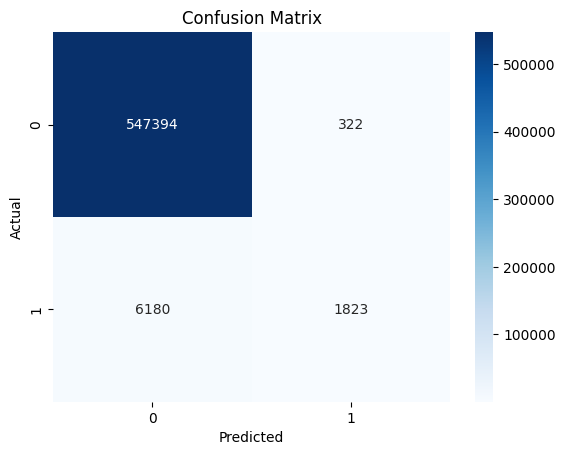

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(all_preds, all_labels)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()